In [3]:
import os
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

# Cow Model testing

In [4]:
#pinkey cow
folder_path = (r'D:\Kampus Merdeka\Documentation\Cow\train\Pinkeye Cow')
test = os.listdir(folder_path)
for fichier in test: 
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [5]:
#healthy cow
folder_path = (r'D:\Kampus Merdeka\Documentation\Cow\train\Healthy Cow')
test = os.listdir(folder_path)
for fichier in test: 
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [6]:
#cek label
image_dir = Path(r'D:\Kampus Merdeka\Documentation\Cow\train')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [8]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(2)

Filepath        Label
0  D:\Kampus Merdeka\Documentation\Cow\train\Heal...  Healthy Cow
1  D:\Kampus Merdeka\Documentation\Cow\train\Pink...  Pinkeye Cow

In [9]:
#Shuffle
# Separate in train and test data
cow_train_df, cow_validasi_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [10]:
#data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
                                   
cow_train_data = train_datagen.flow_from_dataframe(dataframe=cow_train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(180,180),
                                         batch_size=16,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',
                                         )

cow_validasi_data = val_datagen.flow_from_dataframe(dataframe=cow_validasi_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(180,180),
                                         batch_size=16,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )

Found 435 validated image filenames belonging to 2 classes.
Found 109 validated image filenames belonging to 2 classes.


In [11]:


# Load the trained model
cow_model = load_model(r'D:\Kampus Merdeka\Documentation\ternaku-bangkit-machine-learning\model\h5\cow\MobileNet_Cow_model_best.h5')

pred = cow_model.predict(cow_validasi_data)
pred_classes = np.argmax(pred,axis=1)
pred_proba = np.max(pred, axis=1)

# Map the label
labels = (cow_train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred_classes = [labels[k] for k in pred_classes]

# Display the result
print(f'The first 15 predictions: {pred_classes[:15]}')

7/7 [==============================] - 3s 256ms/step
The first 15 predictions: ['Healthy Cow', 'Pinkeye Cow', 'Pinkeye Cow', 'Pinkeye Cow', 'Healthy Cow', 'Pinkeye Cow', 'Pinkeye Cow', 'Healthy Cow', 'Pinkeye Cow', 'Pinkeye Cow', 'Pinkeye Cow', 'Healthy Cow', 'Pinkeye Cow', 'Pinkeye Cow', 'Pinkeye Cow']


C:\Users\Fenny Puspitasari\AppData\Local\Temp\ipykernel_14660\1629633145.py:47: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = cow_model.predict_generator(cow_validasi_data)


Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

 Healthy Cow       0.97      0.95      0.96        40
 Pinkeye Cow       0.97      0.99      0.98        69

    accuracy                           0.97       109
   macro avg       0.97      0.97      0.97       109
weighted avg       0.97      0.97      0.97       109



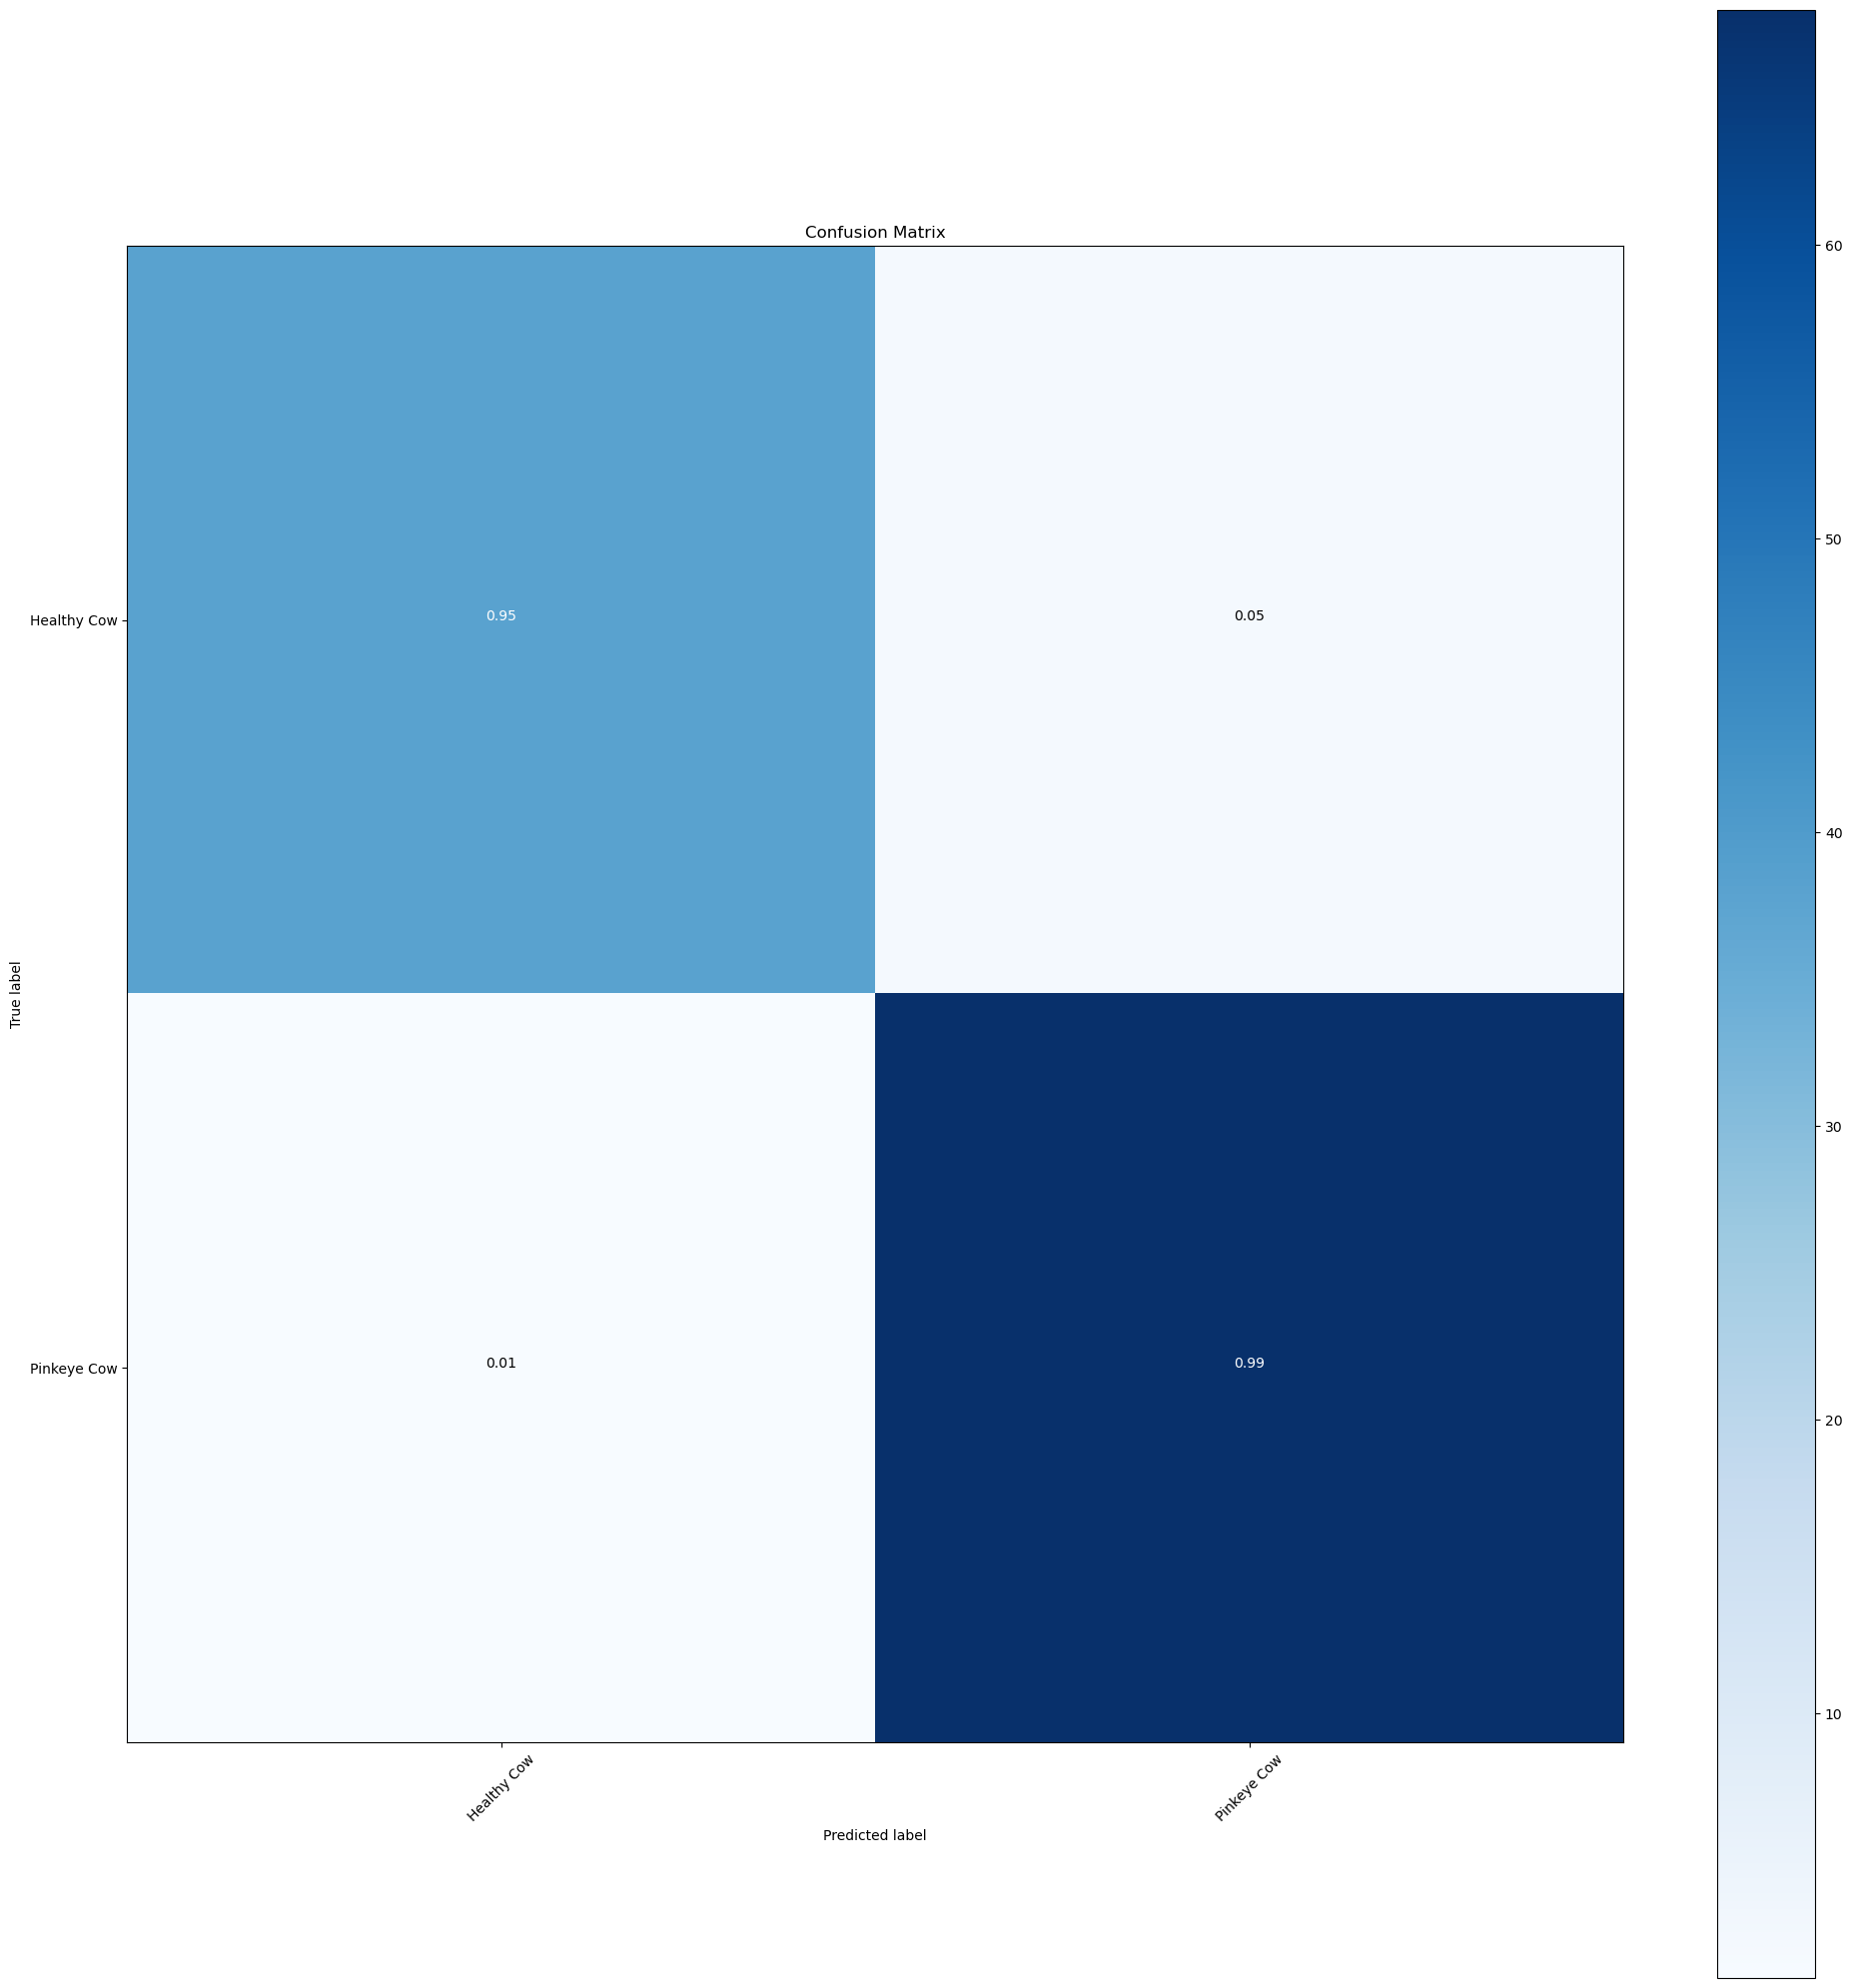

In [16]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False

target_names = []
for key in cow_validasi_data.class_indices:
    target_names.append(key)

# print(target_names)

#Confution Matrix 

Y_pred = cow_model.predict_generator(cow_validasi_data)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(cow_validasi_data.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

#Print Classification Report
print('Classification Report')
print(classification_report(cow_validasi_data.classes, y_pred, target_names=target_names))

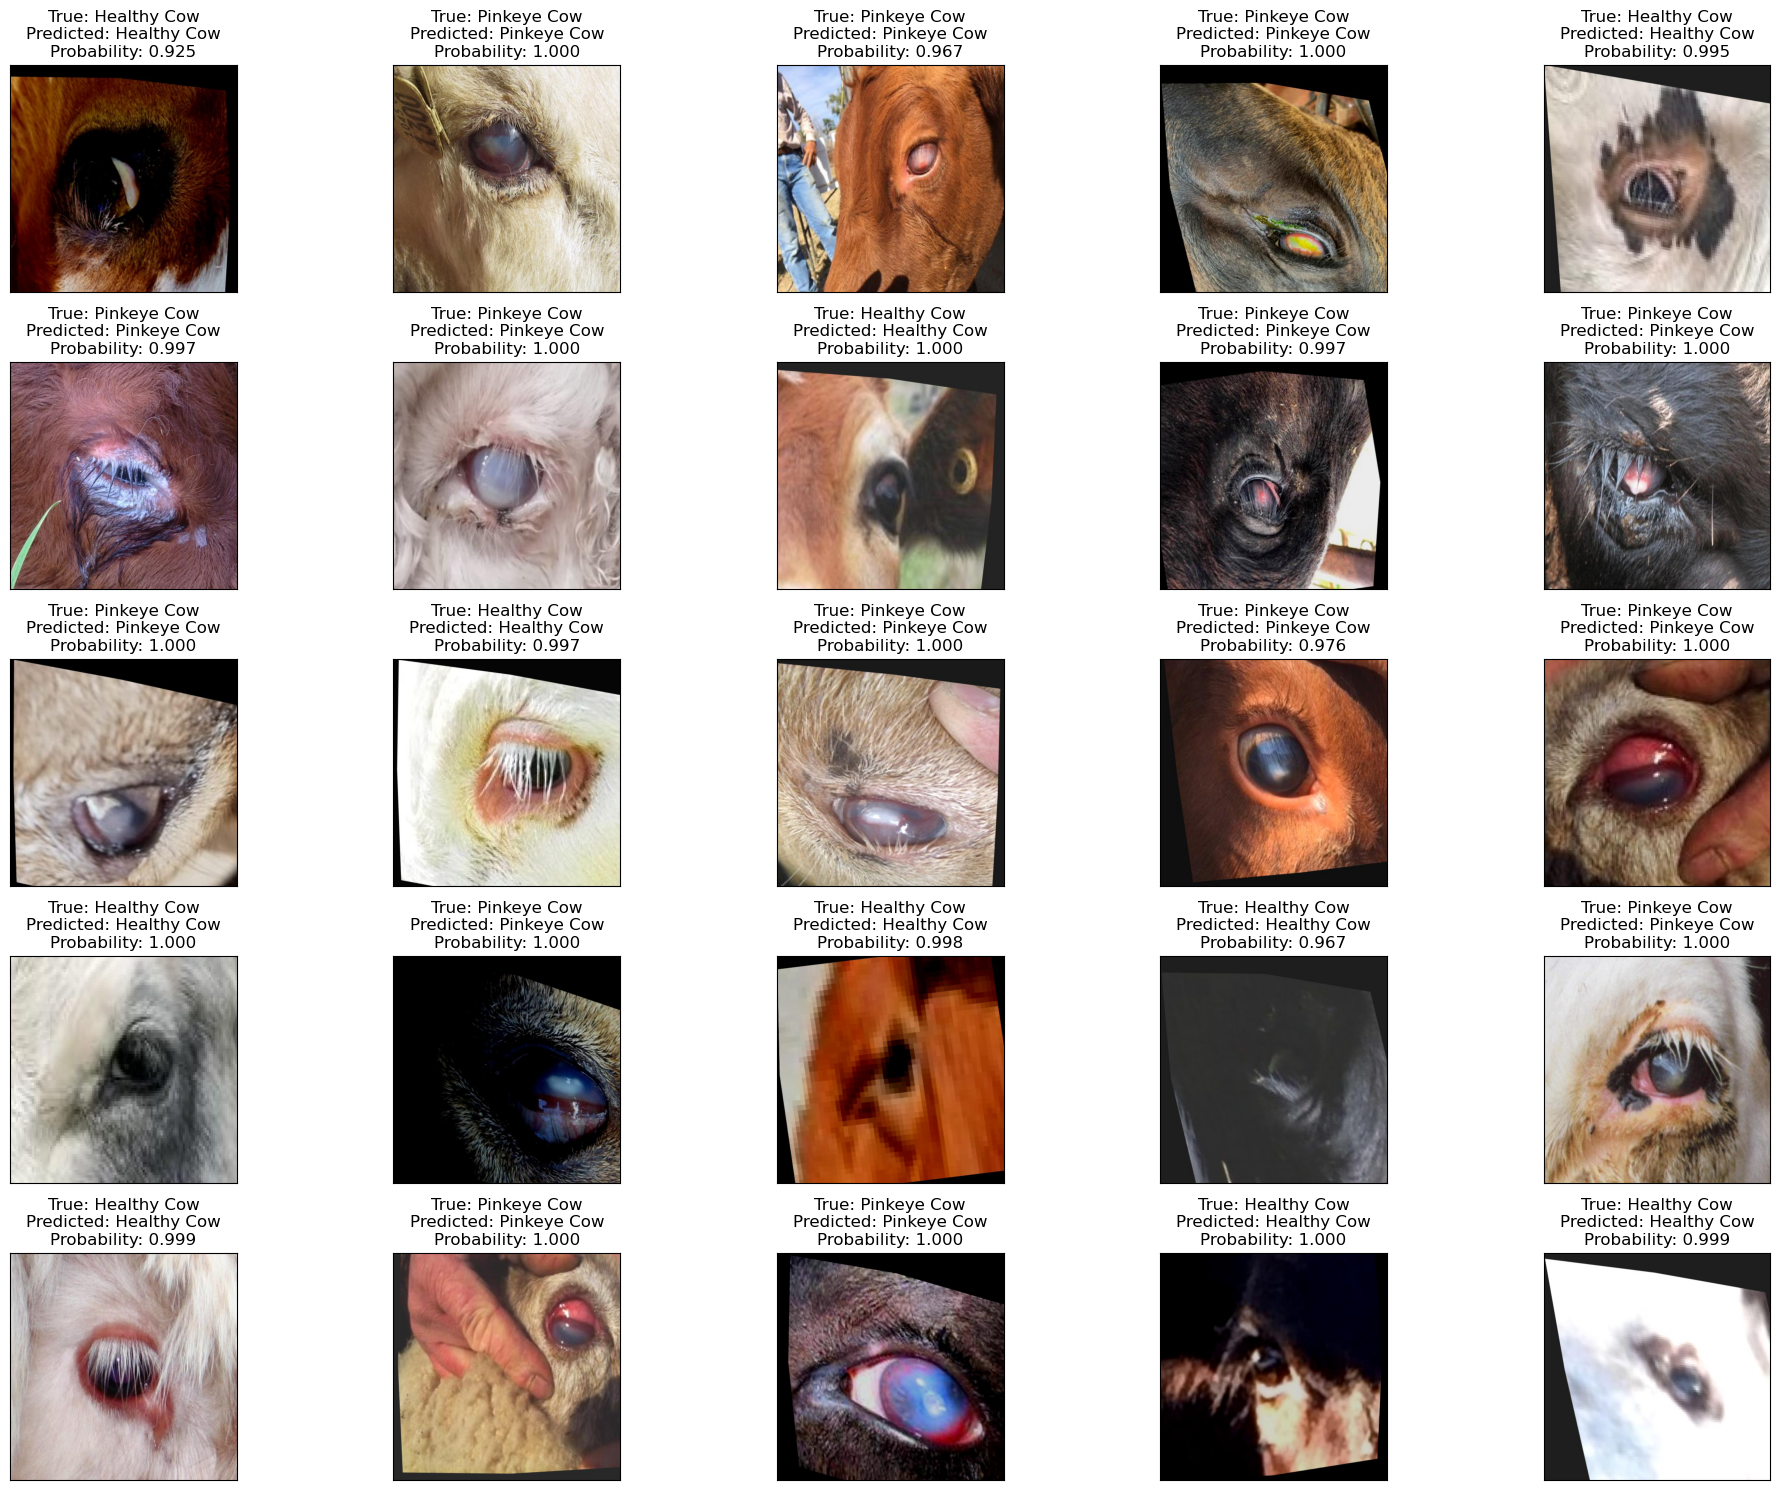

In [17]:
# Display the result
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(cow_validasi_df.Filepath.iloc[i]))
    ax.set_title(f"True: {cow_validasi_df.Label.iloc[i]}\nPredicted: {pred_classes[i]}\nProbability: {pred_proba[i]:.3f}")
plt.tight_layout()
plt.show()

# Goat Model testing

In [18]:
#pinkey goat
folder_path = (r'D:\Kampus Merdeka\Documentation\Goat\train\Pinkeye Goat')
test = os.listdir(folder_path)
for fichier in test: 
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [19]:
#healthy goat
folder_path = (r'D:\Kampus Merdeka\Documentation\Goat\train\Healthy Goat')
test = os.listdir(folder_path)
for fichier in test: 
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [20]:
#cek label
image_dir = Path(r'D:\Kampus Merdeka\Documentation\Goat\train')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [21]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(2)

Filepath         Label
0  D:\Kampus Merdeka\Documentation\Goat\train\Hea...  Healthy Goat
1  D:\Kampus Merdeka\Documentation\Goat\train\Pin...  Pinkeye Goat

In [22]:
# Separate in train and test data
goat_train_df, goat_validasi_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [23]:
#data generator
goat_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    horizontal_flip=True)

goat_val_datagen = ImageDataGenerator(rescale=1./255)
                                   
goat_train_data = goat_train_datagen.flow_from_dataframe(dataframe=goat_train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(180,180),
                                         batch_size=16,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',
                                         )

goat_validasi_data = goat_val_datagen.flow_from_dataframe(dataframe=goat_validasi_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(180,180),
                                         batch_size=16,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )

Found 476 validated image filenames belonging to 2 classes.
Found 119 validated image filenames belonging to 2 classes.


In [24]:

# Load the trained model
goat_model = load_model(r'D:\Kampus Merdeka\Documentation\ternaku-bangkit-machine-learning\model\h5\goat\MobileNet_Goat_model_best.h5')

pred = goat_model.predict(goat_validasi_data)
pred_classes = np.argmax(pred,axis=1)
pred_proba = np.max(pred, axis=1)

# Map the label
labels = (goat_train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred_classes = [labels[k] for k in pred_classes]

# Display the result
print(f'The first 15 predictions: {pred_classes[:15]}')

8/8 [==============================] - 3s 227ms/step
The first 15 predictions: ['Pinkeye Goat', 'Healthy Goat', 'Healthy Goat', 'Pinkeye Goat', 'Healthy Goat', 'Pinkeye Goat', 'Pinkeye Goat', 'Pinkeye Goat', 'Healthy Goat', 'Healthy Goat', 'Healthy Goat', 'Pinkeye Goat', 'Pinkeye Goat', 'Pinkeye Goat', 'Pinkeye Goat']


C:\Users\Fenny Puspitasari\AppData\Local\Temp\ipykernel_14660\1884221755.py:47: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = goat_model.predict_generator(goat_validasi_data)


Confusion Matrix
Normalized confusion matrix
Classification Report
              precision    recall  f1-score   support

Healthy Goat       1.00      0.97      0.99        39
Pinkeye Goat       0.99      1.00      0.99        80

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119



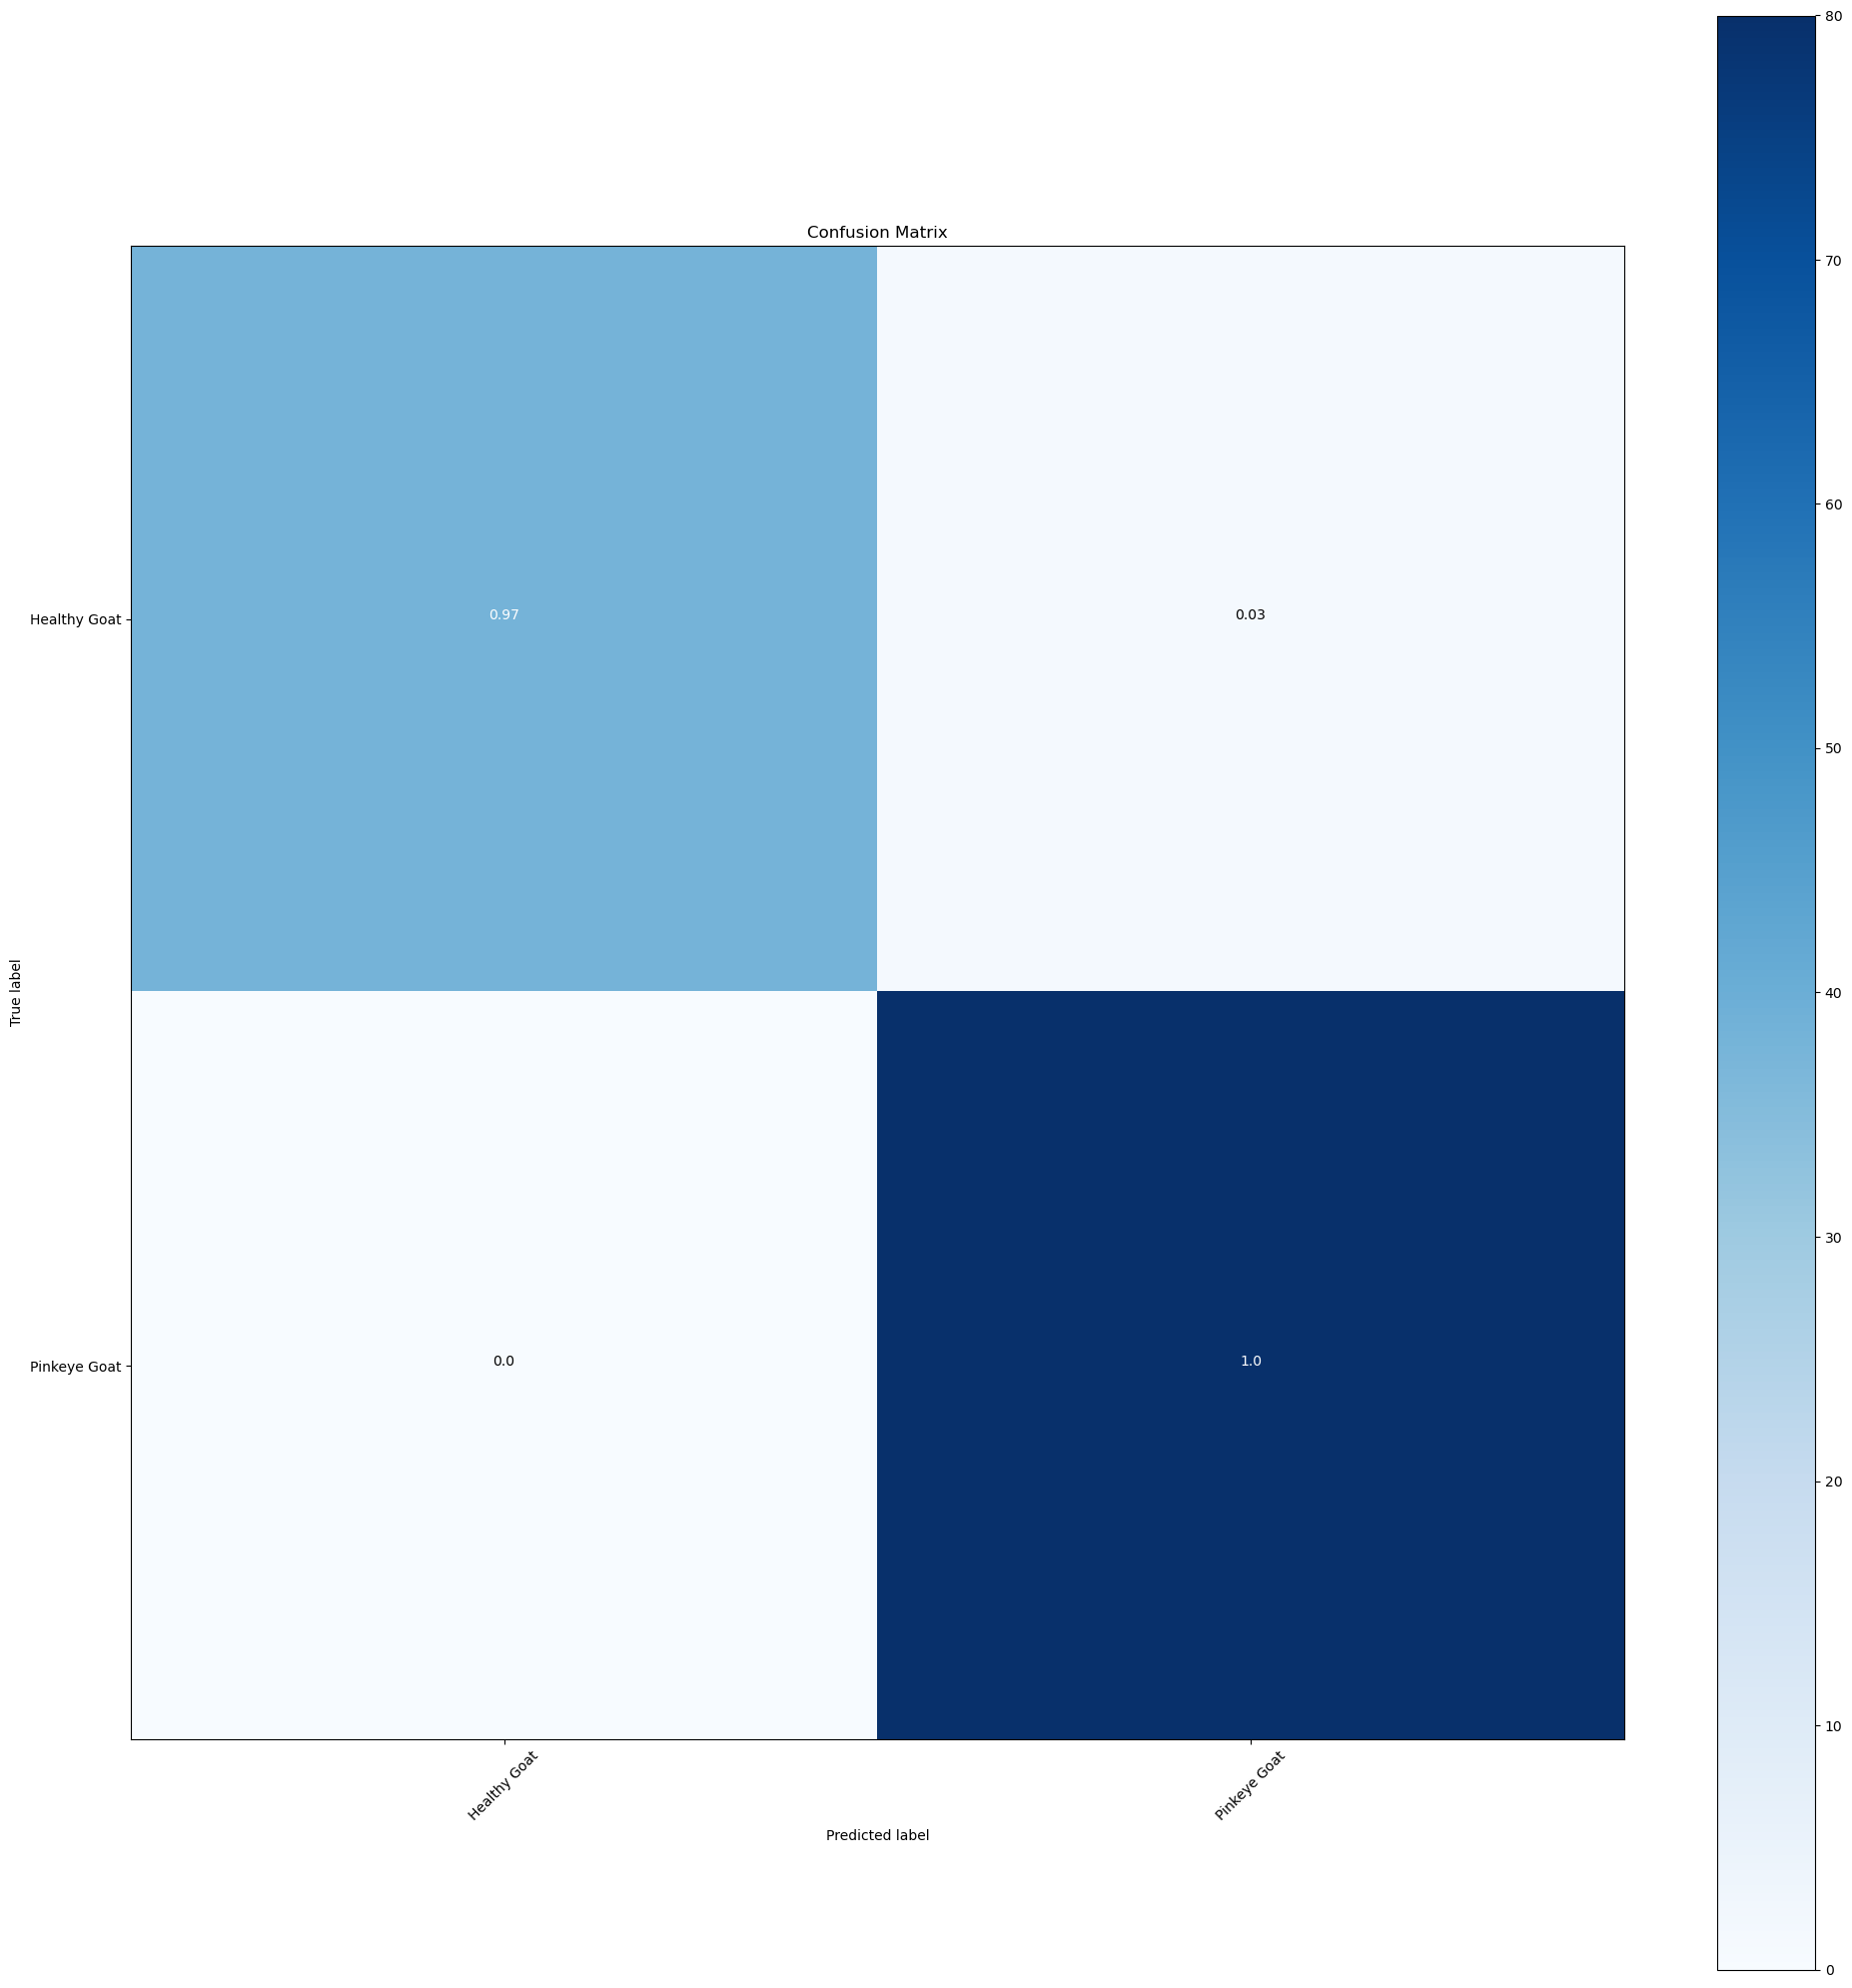

In [25]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,20))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
#shuffle=False

target_names = []
for key in goat_validasi_data.class_indices:
    target_names.append(key)

# print(target_names)

#Confution Matrix 

Y_pred = goat_model.predict_generator(goat_validasi_data)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(goat_validasi_data.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

#Print Classification Report
print('Classification Report')
print(classification_report(goat_validasi_data.classes, y_pred, target_names=target_names))

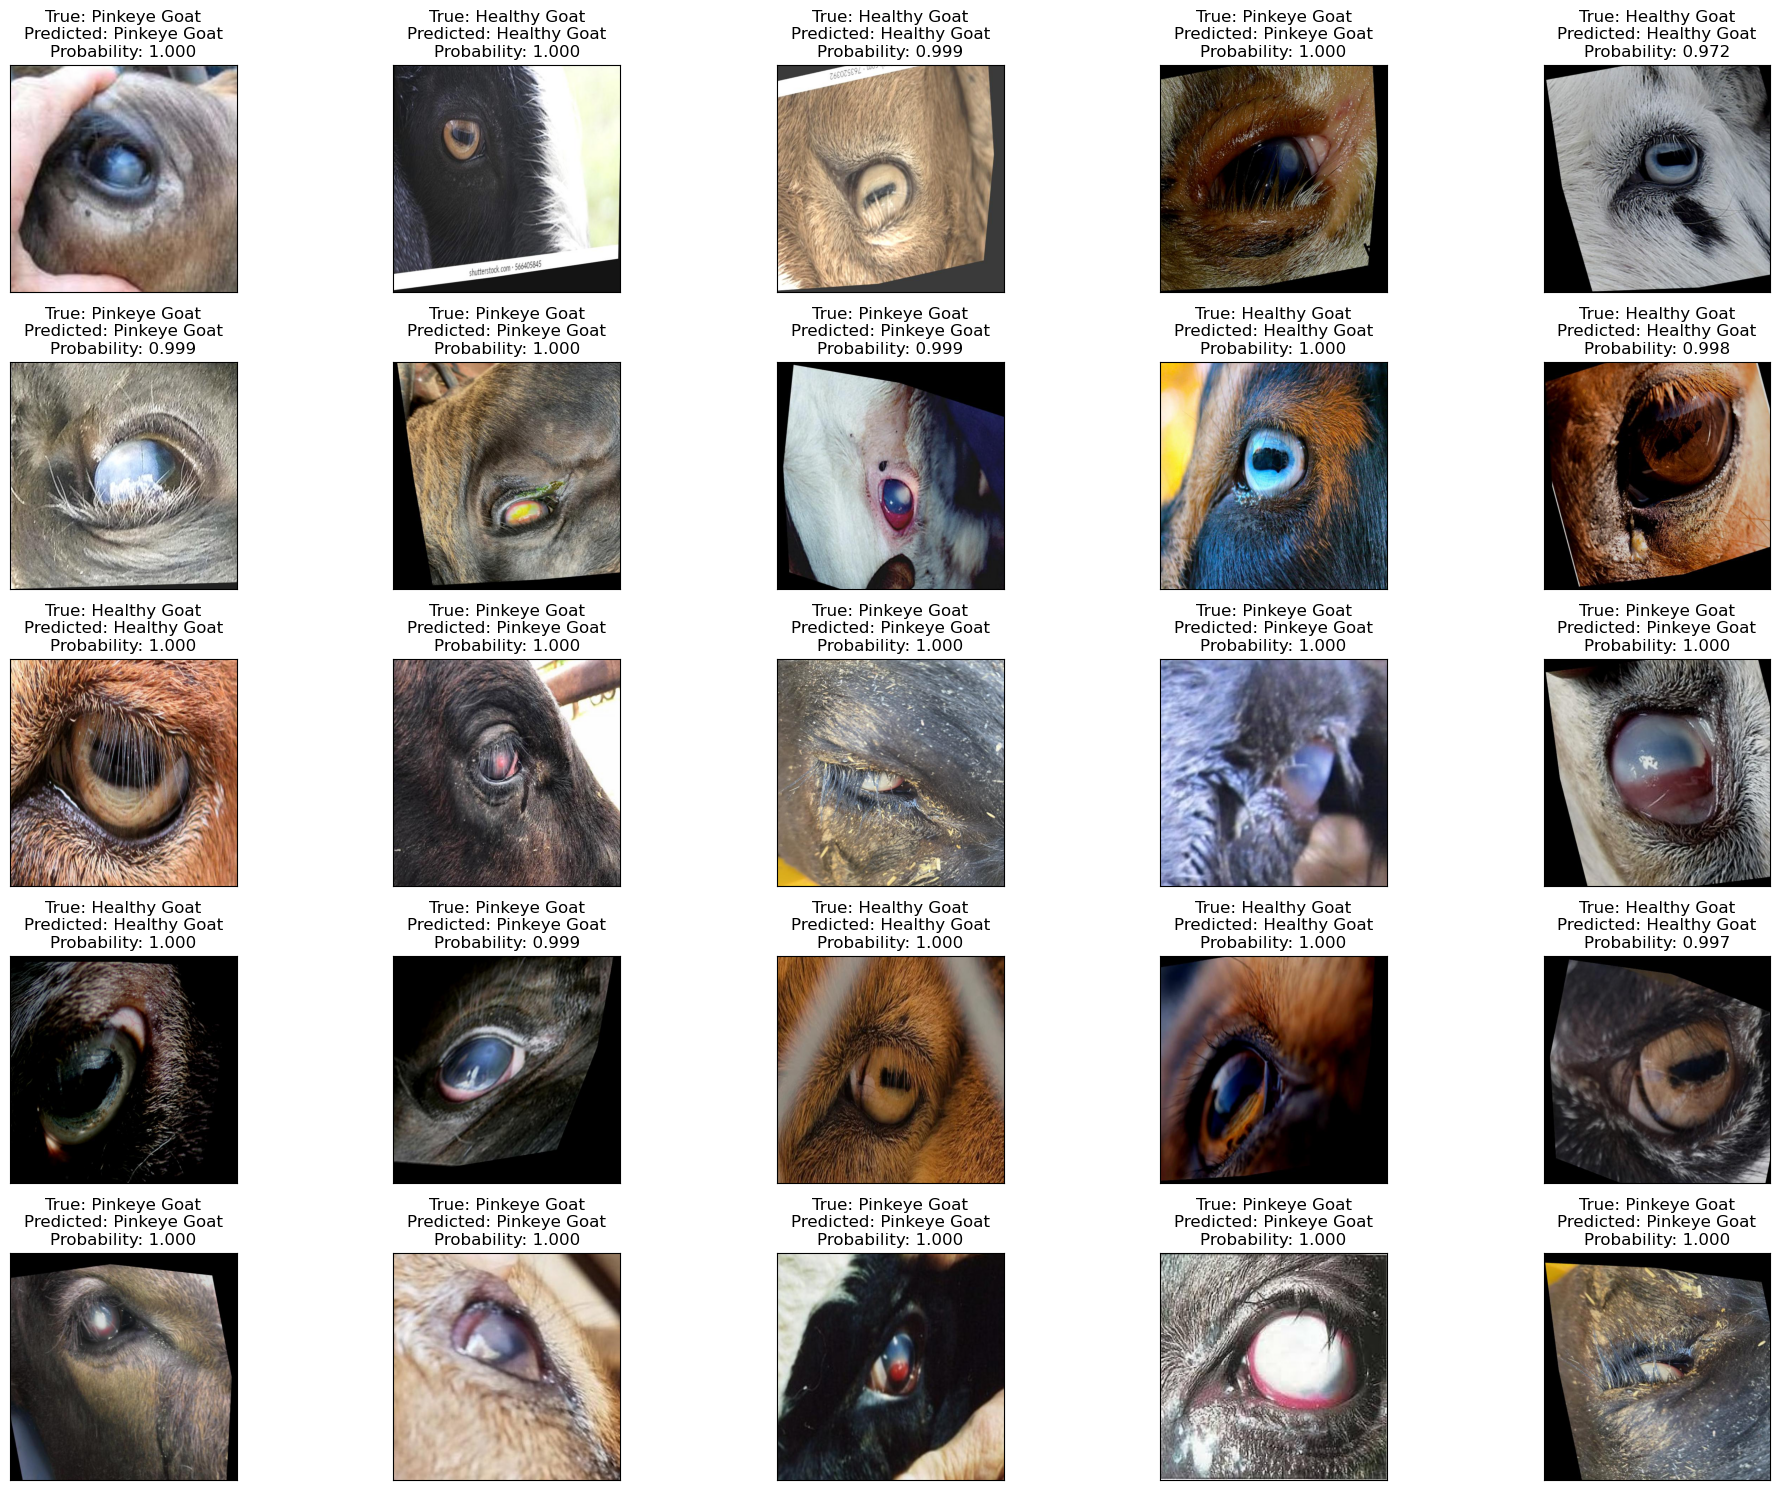

In [26]:
# Display the result
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(goat_validasi_df.Filepath.iloc[i]))
    ax.set_title(f"True: {goat_validasi_df.Label.iloc[i]}\nPredicted: {pred_classes[i]}\nProbability: {pred_proba[i]:.3f}")
plt.tight_layout()
plt.show()